# Aprendizaje no Supervisado

## Importe de librerias

In [149]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#!pip install kneed
from kneed import KneeLocator

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis

#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

In [150]:
import warnings
warnings.filterwarnings('ignore')

## Lectura de Dataset

In [151]:
df1_out = pd.read_csv('https://raw.githubusercontent.com/jfelipeo/Proyecto_Analitica_II_M3_Equipo5/main/data_sin_outliers.csv', sep=",")
df1_out_frec = pd.read_csv('https://raw.githubusercontent.com/jfelipeo/Proyecto_Analitica_II_M3_Equipo5/main/data_sin_outliers_frecuencia.csv', sep=",")


In [152]:
df1_out.head(5)


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,26,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,0,1,2,1,0,1,0.855365,-0.032906,-0.231133
1,0,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,1,1,1,1,0,0,1.477769,0.941840,-0.525284
2,23,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,0,1,0,1,0,0,0.777564,-0.357821,-0.378208
3,7,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,0,1,2,1,1,0,-0.856246,-0.682736,-0.231133
4,23,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,0,1,2,1,0,1,0.855365,-0.032906,-0.378208


In [153]:
df1_out_frec.head(5)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,0.047143,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,0,1,2,1,0,1,0.855365,-0.032906,-0.231133
1,0.061429,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,1,1,1,1,0,0,1.477769,0.941840,-0.525284
2,0.202857,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,0,1,0,1,0,0,0.777564,-0.357821,-0.378208
3,0.021429,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,0,1,2,1,1,0,-0.856246,-0.682736,-0.231133
4,0.202857,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,0,1,2,1,0,1,0.855365,-0.032906,-0.378208


## Reducción de la dimensionalidad

In [154]:
#Crear un dataset reducido el cual tendria una explicacion del 85% de la varianza para tomar 3 componentes
pca = PCA(n_components=.85).fit(df1_out) # para df1_out (sin tratar variables categoricas por la frecuencia)

#Crear un dataset reducido el cual tendria una explicacion del 60% de la varianza para tomar 3 componentes
pca_2 = PCA(n_components=.60).fit(df1_out_frec) # para df1_out (con variables categoricas tratadas con la frecuencia)

# Número de componentes tomados por PCA
print ('El número de componentes tomados por PCA es: ',pca.n_components_)
print ('El número de componentes tomados por PCA_2 es: ',pca_2.n_components_)

El número de componentes tomados por PCA es:  3
El número de componentes tomados por PCA_2 es:  3


## Varianza Explicada

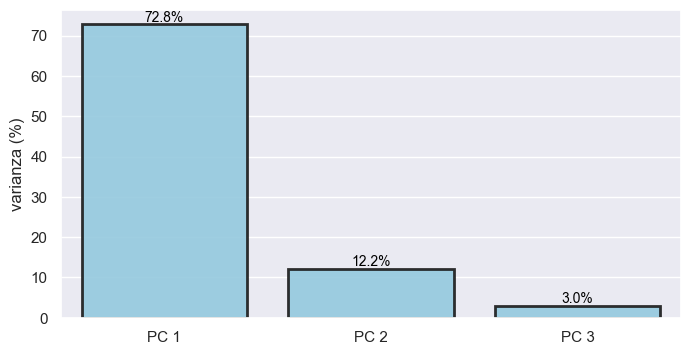

In [155]:
# Varianza explicada PCA sin tratamiento de variables categoricas
PCA_varianza = pd.DataFrame({'varianza (%)': pca.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

bar = sns.barplot(x = ['PC ' +  str(i) for i in range(1, 4)],
                  y = PCA_varianza['varianza (%)'],                  
                  linewidth=2, edgecolor="k", color="skyblue",
                  alpha=0.9)

# Agregar los porcentajes encima de las barras
for idx, percent in enumerate(PCA_varianza['varianza (%)']):
    bar.annotate('{:.1f}%'.format(percent), 
                 xy=(idx, percent), 
                 ha='center', 
                 va='bottom', 
                 fontsize=10, 
                 color='black')

plt.show()

Al tomar 3 componentes principales, con el dataset sin atípicos reducido, estamos explicando 88% de la varianza.

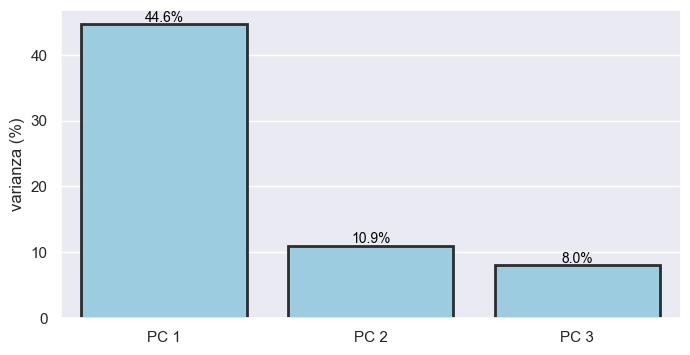

In [156]:
# Varianza explicada PCA con tratamiento de variables categoricas
PCA_varianza_2 = pd.DataFrame({'varianza (%)': pca_2.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

bar = sns.barplot(x = ['PC ' +  str(i) for i in range(1, 4)],
                  y = PCA_varianza_2['varianza (%)'],
                  linewidth=2, edgecolor="k", color="skyblue",
                  alpha=0.9)

# Agregar los porcentajes encima de las barras
for idx, percent in enumerate(PCA_varianza_2['varianza (%)']):
    bar.annotate('{:.1f}%'.format(percent), 
                 xy=(idx, percent), 
                 ha='center', 
                 va='bottom', 
                 fontsize=10, 
                 color='black')

plt.show()

Al tomar 3 componentes principales, con el dataset sin atípicos con tratamiento de la variable categorica reducido, estamos explicando 63.5% de la varianza.

## Transformación de los dataset

In [157]:
# Reduccion de la dimencionalidad transformando el dataset df1_out
X_pca = pca.fit_transform(df1_out)
X_pca

array([[-7.05888785, -0.61068691,  0.49312471],
       [18.92617412,  0.38940549, -3.26411468],
       [-4.13344576, -0.42103923, -1.42858163],
       ...,
       [18.75354298,  7.05904356,  2.82946626],
       [18.71199257,  6.89117881,  0.42826239],
       [18.68954849,  6.83784835, -0.50388579]])

In [158]:
# Reduccion de la dimencionalidad transformando el dataset df1_out_frec
X_pca2 = pca_2.fit_transform(df1_out_frec)
X_pca2

array([[-0.38121627,  0.49263662,  0.73568649],
       [-0.21395166, -3.26263542,  0.68496523],
       [-0.27304302, -1.42932901, -0.37034432],
       ...,
       [ 6.44984493,  2.83127121,  2.18705372],
       [ 6.2923981 ,  0.42974121, -0.33744613],
       [ 6.24493864, -0.50266593, -2.47652349]])

# Algoritmos Clusterin

## * K-Means (Dataset df1_out Escalado)

### Selección de K optimo

In [159]:
# Número optimo de k
lista = [] # Para dataset sin tratamiento de categoricas
lista2 = [] # Para dataset con tratamiento de categoricas

for df, Lista in zip([df1_out, df1_out_frec], [lista, lista2]):

    for i in range(1, 20):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        Lista.append(kmeans.inertia_)

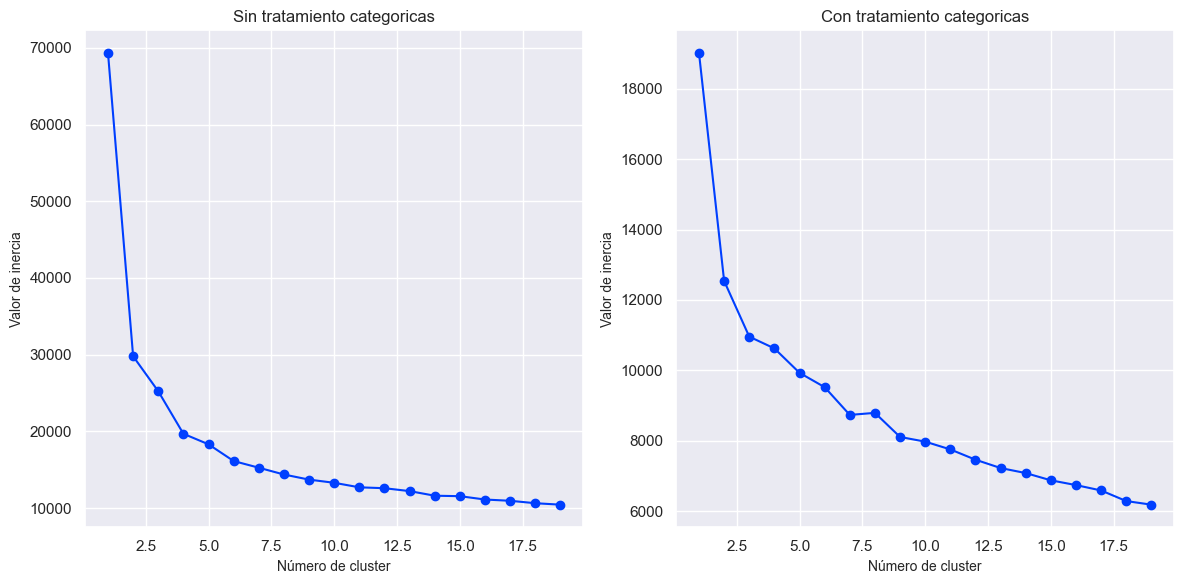

In [160]:
# Gráfico de curva método del codo para ambos datasets en paralelo
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Dataset sin tratamiento
axs[0].plot(range(1, 20), lista)
axs[0].scatter(range(1, 20), lista)
axs[0].set_xlabel("Número de cluster", size=10)
axs[0].set_ylabel("Valor de inercia", size=10)
axs[0].set_title("Sin tratamiento categoricas", size=12)

# Dataset con tratamiento
axs[1].plot(range(1, 20), lista2)
axs[1].scatter(range(1, 20), lista2)
axs[1].set_xlabel("Número de cluster", size=10)
axs[1].set_ylabel("Valor de inercia", size=10)
axs[1].set_title("Con tratamiento categoricas", size=12)

plt.tight_layout()
plt.show()

No es clara la curva para identificar el codo, puede ser que este dataset no es el optimo para realizar este tipo de agrupaciones o algoritmos de clustering. Tambien la posibilidad tener variables que podrian influir en el posicionamiento de los puntos. La naturaleza de las variables que nos esten afectando.

In [161]:
# Miremos la selección de k de manera automática para ambas listas
kl= KneeLocator(range(1, 20), lista, curve="convex", direction="decreasing")
kl_2 = KneeLocator(range(1, 20), lista2, curve="convex", direction="decreasing")

print("El valor óptimo de k para lista es:", kl.elbow)
print("El valor óptimo de k para lista2 es:", kl_2.elbow)

El valor óptimo de k para lista es: 4
El valor óptimo de k para lista2 es: 7


### Definición de constantes para K-Means

In [162]:
# Definir constantes para K-Means
kmeans_constants = {"init": "random", "n_init": 100, "max_iter": 500, "random_state": 42}

# Modelo K-Means para el primer DataFrame sin tratamiento de categoricas
model_kmeans = KMeans(n_clusters=kl.elbow, **kmeans_constants)
model_kmeans.fit(df1_out)

KMeans(init='random', max_iter=500, n_clusters=4, n_init=100, random_state=42)

In [163]:
# Modelo K-Means para el segundo DataFrame con tratamiento de categoricas
model_kmeans_2 = KMeans(n_clusters=kl_2.elbow, **kmeans_constants)
model_kmeans_2.fit(df1_out_frec)

KMeans(init='random', max_iter=500, n_clusters=7, n_init=100, random_state=42)

In [164]:
# Modelo K-Means para el segundo DataFrame con tratamiento de categoricas
model_kmeans_3 = KMeans(n_clusters=4, **kmeans_constants)
model_kmeans_3.fit(df1_out_frec)

KMeans(init='random', max_iter=500, n_clusters=4, n_init=100, random_state=42)

### Metricas de desempeño

In [165]:
# !pip install tabulate

from tabulate import tabulate

# Evaluación de ambos modelos K-Means
headers = ["Modelo", "Inertia", "Silhouette Score", "Calinski-Harabasz Score"]
data = [
    ["Modelo 1 K-Means escalado (4 cluster)", model_kmeans.inertia_, silhouette_score(df1_out, model_kmeans.labels_), calinski_harabasz_score(df1_out, model_kmeans.labels_)],
    ["Modelo 2 K-Means escalado y tratado (7 cluster)", model_kmeans_2.inertia_, silhouette_score(df1_out_frec, model_kmeans_2.labels_), calinski_harabasz_score(df1_out_frec, model_kmeans_2.labels_)],
    ["Modelo 3 K-Means escalado y tratado (4 cluster)", model_kmeans_3.inertia_, silhouette_score(df1_out_frec, model_kmeans_3.labels_), calinski_harabasz_score(df1_out_frec, model_kmeans_3.labels_)]
]

print(tabulate(data, headers=headers, tablefmt="grid"))

+-------------------------------------------------+-----------+--------------------+---------------------------+
| Modelo                                          |   Inertia |   Silhouette Score |   Calinski-Harabasz Score |
+=================================================+===========+====================+===========================+
| Modelo 1 K-Means escalado (4 cluster)           |  19681.4  |           0.282076 |                   585.238 |
+-------------------------------------------------+-----------+--------------------+---------------------------+
| Modelo 2 K-Means escalado y tratado (7 cluster) |   8659.53 |           0.151742 |                   138.077 |
+-------------------------------------------------+-----------+--------------------+---------------------------+
| Modelo 3 K-Means escalado y tratado (4 cluster) |  10150.8  |           0.217294 |                   202.521 |
+-------------------------------------------------+-----------+--------------------+------------

* Inertia: Mide la dispersión de los puntos dentro de cada clúster. Un valor más bajo de la inercia indica que los clústeres son más compactos y están más cerca unos de otros. Sin embargo, la inercia por sí sola no es suficiente para determinar el número óptimo de clústeres.
* Silhouette Score: El valor de la puntuación de silueta varía entre -1 y 1. Un valor alto indica que el punto está bien emparejado con su propio clúster y mal emparejado con clústeres vecinos. Si la mayoría de los puntos tienen un alto valor de silueta, la configuración del clúster es apropiada. Si muchos puntos tienen un valor bajo o negativo, sugiere que puede haber demasiados o muy pocos clústeres.
* Calinski-Harabasz Score: La puntuación de Calinski-Harabasz es una medida de cuán densamente están distribuidos los clústeres y qué tan separados están unos de otros. Cuanto mayor sea la puntuación de Calinski-Harabasz, más compactos y separados están los clústeres entre sí. Es una medida útil para determinar la cohesión y la separación de los clústeres. Un valor más alto indica una mejor separación entre clústeres.

El modelo 1, a pesar de tener una inercia muy alta en comparación a los otros modelos, presenta unas metricas de silueta y Calinski mayor. Por lo tanto tomaremos como referencia el primer modelo (con las variables numericas escaladas y sin tratamiento de las variables categoricas) y compararlo con los demas algoritmos.

### Predicción del cluster

In [166]:
# Predicción de los clusters
cluster_1 = model_kmeans.fit_predict(df1_out)
cluster_1

array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3,
       3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 2, 1, 3, 3,
       1, 3, 1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 3, 0, 0, 1, 3, 1, 1, 3, 1, 1,
       1, 3, 1, 0, 1, 3, 3, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,

In [167]:
# hacemos copia del df1_out agregandole la columna de clusters
df_clusters = df1_out.copy()
df_clusters['cluster_1'] = cluster_1

df_clusters.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours,cluster_1
0,26,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,0,1,2,1,0,1,0.855365,-0.032906,-0.231133,0
1,0,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,1,1,1,1,0,0,1.477769,0.941840,-0.525284,2
2,23,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,0,1,0,1,0,0,0.777564,-0.357821,-0.378208,0
3,7,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,0,1,2,1,1,0,-0.856246,-0.682736,-0.231133,1
4,23,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,0,1,2,1,0,1,0.855365,-0.032906,-0.378208,0


In [168]:
# Validacion de etiquetas
df_clusters.cluster_1.unique()

array([0, 2, 1, 3])

## * K-Means (Dataset Reducido)

### Selección de K optimo

In [169]:
# Número optimo de k
lista = [] # Para dataset sin tratamiento de categoricas
lista2 = [] # Para dataset con tratamiento de categoricas

for df, Lista in zip([X_pca, X_pca2], [lista, lista2]):

    for i in range(1, 20):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        Lista.append(kmeans.inertia_)

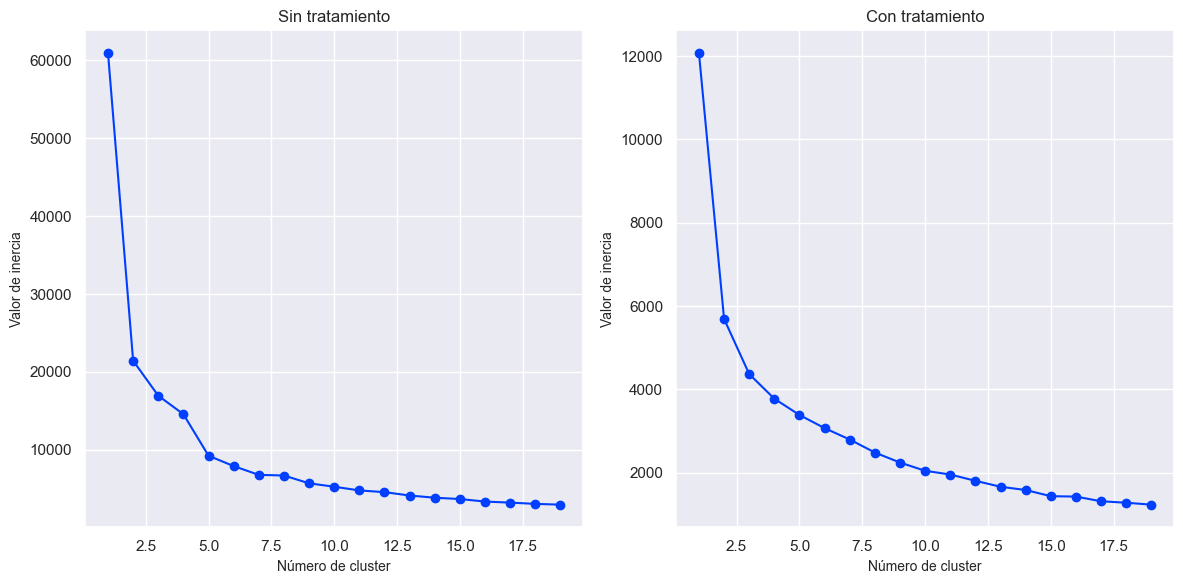

In [170]:
# Gráfico de curva método del codo para ambos datasets en paralelo
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Dataset sin tratamiento
axs[0].plot(range(1, 20), lista)
axs[0].scatter(range(1, 20), lista)
axs[0].set_xlabel("Número de cluster", size=10)
axs[0].set_ylabel("Valor de inercia", size=10)
axs[0].set_title("Sin tratamiento", size=12)

# Dataset con tratamiento
axs[1].plot(range(1, 20), lista2)
axs[1].scatter(range(1, 20), lista2)
axs[1].set_xlabel("Número de cluster", size=10)
axs[1].set_ylabel("Valor de inercia", size=10)
axs[1].set_title("Con tratamiento", size=12)

plt.tight_layout()
plt.show()

In [171]:
# Miremos la selección de k de manera automática para ambas listas
kl= KneeLocator(range(1, 20), lista, curve="convex", direction="decreasing")
kl_2 = KneeLocator(range(1, 20), lista2, curve="convex", direction="decreasing")

print("El valor óptimo de k para lista es:", kl.elbow)
print("El valor óptimo de k para lista2 es:", kl_2.elbow)

El valor óptimo de k para lista es: 5
El valor óptimo de k para lista2 es: 3


### Definición de constantes para K-Means

In [172]:
# Definir constantes para K-Means
kmeans_constants = {"init": "random", "n_init": 100, "max_iter": 500, "random_state": 42}

# Modelo K-Means para el primer DataFrame sin tratamiento de categoricas
model_kmeans = KMeans(n_clusters=kl.elbow, **kmeans_constants)
model_kmeans.fit(X_pca)

KMeans(init='random', max_iter=500, n_clusters=5, n_init=100, random_state=42)

In [173]:
# Modelo K-Means para el segundo DataFrame con tratamiento de categoricas
model_kmeans_2 = KMeans(n_clusters=kl_2.elbow, **kmeans_constants)
model_kmeans_2.fit(X_pca2)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=100, random_state=42)

### Metricas de desempeño

In [174]:
# Evaluación de ambos modelos K-Means
headers = ["Modelo", "Inertia", "Silhouette Score", "Calinski-Harabasz Score"]
data = [
    ["Primer modelo K-Means Reducido", model_kmeans.inertia_, silhouette_score(X_pca, model_kmeans.labels_), calinski_harabasz_score(X_pca, model_kmeans.labels_)],
    ["Segundo modelo con tratamiento categoricas K-Means Reducido", model_kmeans_2.inertia_, silhouette_score(X_pca2, model_kmeans_2.labels_), calinski_harabasz_score(X_pca2, model_kmeans_2.labels_)]
]

print(tabulate(data, headers=headers, tablefmt="grid"))

+-------------------------------------------------------------+-----------+--------------------+---------------------------+
| Modelo                                                      |   Inertia |   Silhouette Score |   Calinski-Harabasz Score |
+=============================================================+===========+====================+===========================+
| Primer modelo K-Means Reducido                              |   9233.61 |           0.387498 |                   973.553 |
+-------------------------------------------------------------+-----------+--------------------+---------------------------+
| Segundo modelo con tratamiento categoricas K-Means Reducido |   4368.44 |           0.331464 |                   615.058 |
+-------------------------------------------------------------+-----------+--------------------+---------------------------+


El primer modelo con PCA reducido presenta una inercia mucho mejor en comparacion con el modelo de K-Means. Aumentando tambien en los resultados de silueta y Calinski. Y en comparacion con el modelo reducido con tratamiento de la variable categorica, a pesar de tener una inercia mayor, en las otras dos metricas es superior (aunque en silueta no es mucha la diferencia).

### Predicción del cluster

In [175]:
# Predicion de los clusters
cluster_2 = model_kmeans.fit_predict(X_pca)
cluster_2_2 = model_kmeans_2.fit_predict(X_pca2)

df_clusters['cluster_2'] = cluster_2

df_clusters.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours,cluster_1,cluster_2
0,26,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,1,2,1,0,1,0.855365,-0.032906,-0.231133,0,0
1,0,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,...,1,1,1,0,0,1.477769,0.941840,-0.525284,2,2
2,23,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,...,1,0,1,0,0,0.777564,-0.357821,-0.378208,0,0
3,7,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,...,1,2,1,1,0,-0.856246,-0.682736,-0.231133,1,4
4,23,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,1,2,1,0,1,0.855365,-0.032906,-0.378208,0,3


In [176]:
# Validacion de etiquetas
df_clusters.cluster_2.unique()

array([0, 2, 4, 3, 1])

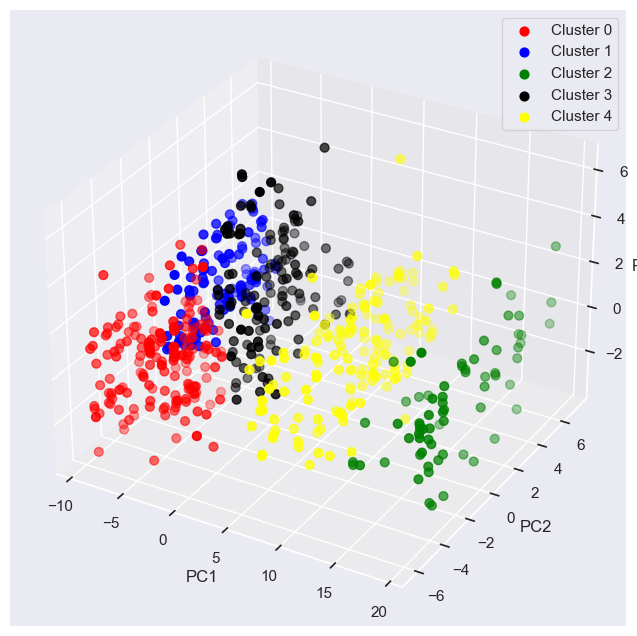

In [177]:
# 3d scatterplot with k-means clusters

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[cluster_2 == 0, 0], X_pca[cluster_2 == 0, 1], X_pca[cluster_2 == 0, 2], s = 40, color = 'red', label = 'Cluster 0')
ax.scatter(X_pca[cluster_2 == 1, 0], X_pca[cluster_2 == 1, 1], X_pca[cluster_2 == 1, 2], s = 40, color = 'blue', label = 'Cluster 1')
ax.scatter(X_pca[cluster_2 == 2, 0], X_pca[cluster_2 == 2, 1], X_pca[cluster_2 == 2, 2], s = 40, color = 'green', label = 'Cluster 2')
ax.scatter(X_pca[cluster_2 == 3, 0], X_pca[cluster_2 == 3, 1], X_pca[cluster_2 == 3, 2], s = 40, color = 'black', label = 'Cluster 3')
ax.scatter(X_pca[cluster_2 == 4, 0], X_pca[cluster_2 == 4, 1], X_pca[cluster_2 == 4, 2], s = 40, color = 'yellow', label = 'Cluster 4')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

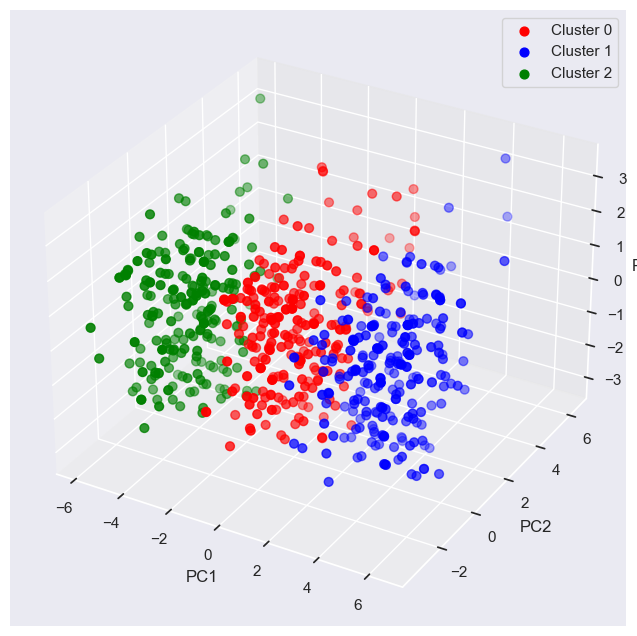

In [178]:
# 3d scatterplot with k-means clusters

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca2[cluster_2_2 == 0, 0], X_pca2[cluster_2_2 == 0, 1], X_pca2[cluster_2_2 == 0, 2], s = 40, color = 'red', label = 'Cluster 0')
ax.scatter(X_pca2[cluster_2_2 == 1, 0], X_pca2[cluster_2_2 == 1, 1], X_pca2[cluster_2_2 == 1, 2], s = 40, color = 'blue', label = 'Cluster 1')
ax.scatter(X_pca2[cluster_2_2 == 2, 0], X_pca2[cluster_2_2 == 2, 1], X_pca2[cluster_2_2 == 2, 2], s = 40, color = 'green', label = 'Cluster 2')


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

## * Clustering Algorithm: Hierarchical Clustering

In [179]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [130]:
dataset = X_pca.copy()

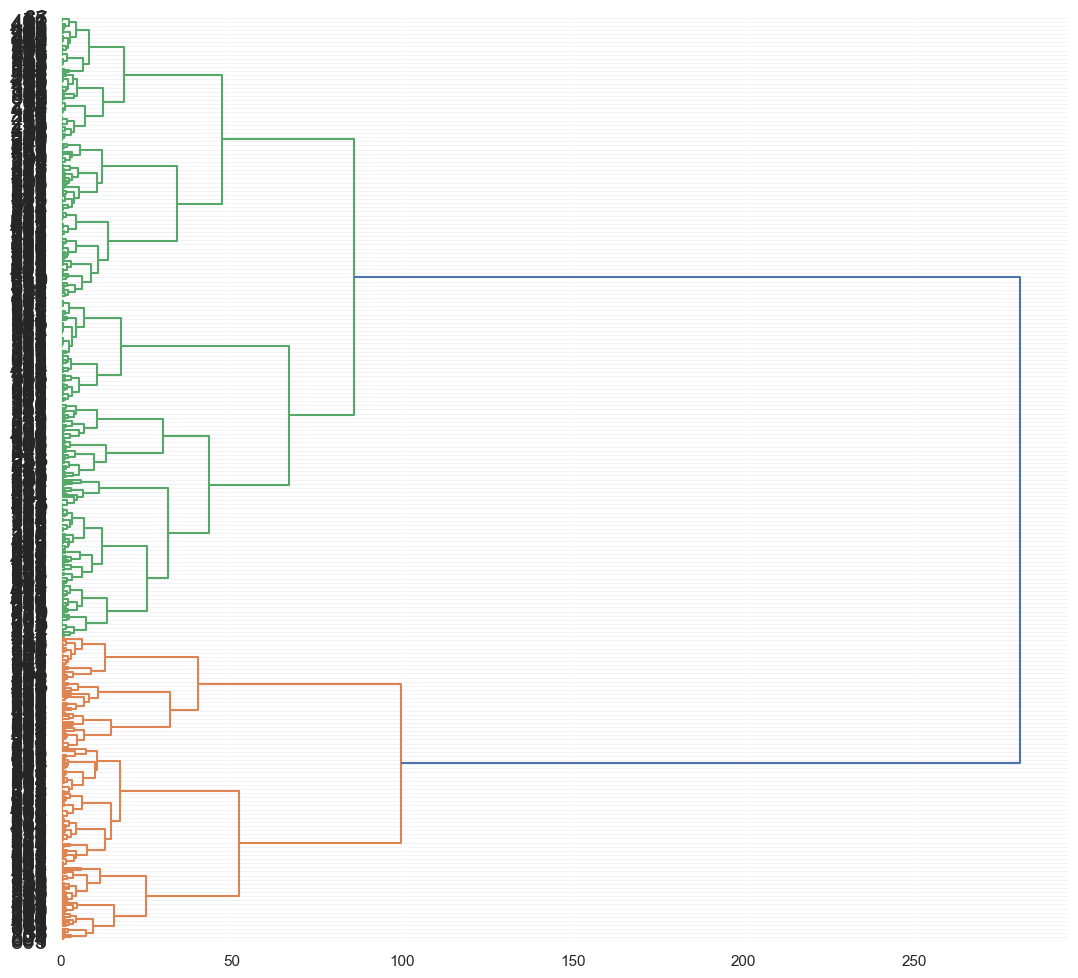

In [180]:
# Estilo de las gráficas
sns.set_theme()

# Función de vinculación para agrupar datos según similud
Z = linkage(dataset, method='ward')

plt.figure(figsize=(13, 12))
dendrogram(
    Z,
    orientation='right',
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

In [183]:
def evaluar_hierarchical_clustering(dataset, n_clusters_list):
    resultados = []
    
    for n_clusters in n_clusters_list:
        # Inicializar y ajustar el modelo
        model_hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
        model_hc.fit(dataset)
        
        # Calcular métricas de evaluación
        silhouette = silhouette_score(dataset, model_hc.labels_)
        calinski = calinski_harabasz_score(dataset, model_hc.labels_)
        
        # Guardar resultados en la lista
        resultados.append({'Clusters': n_clusters,
                           'Silhouette Score': silhouette,
                           'Calinski Harabasz Score': calinski})
    
    # Convertir la lista de resultados en un DataFrame
    df_resultados = pd.DataFrame(resultados)
    
    return df_resultados



In [184]:
# Lista de valores para el número de clusters
n_clusters_list = [2, 3, 4, 5, 6]

# Llamar a la función para evaluar el clustering jerárquico con diferentes números de clusters
resultados_hc = evaluar_hierarchical_clustering(dataset, n_clusters_list)

# Imprimir la tabla de resultados
print(resultados_hc)

   Clusters  Silhouette Score  Calinski Harabasz Score
0         2          0.562577              1280.118254
1         3          0.475162               934.557077
2         4          0.333618               867.165999
3         5          0.319032               821.812863
4         6          0.309038               773.849303


## * Algoritmo DBSCAN (Dataset Escalado)

In [185]:
from sklearn.neighbors import NearestNeighbors

# Gráfica de distancias K

neighbors = NearestNeighbors(n_neighbors=2)
neighbors.fit(df1_out)

distances, *other = neighbors.kneighbors(df1_out)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis=0)
distances

(700,)


array([0.07353764, 0.07353764, 0.07353764, 0.07353764, 0.07353764,
       0.07353764, 0.07353764, 0.07353764, 0.07353764, 0.07353764,
       0.07353764, 0.07353764, 0.07353764, 0.07353764, 0.07353764,
       0.07353764, 0.07353764, 0.07353764, 0.07353764, 0.07353764,
       0.07353764, 0.07353764, 0.07353764, 0.07353764, 0.07353764,
       0.07353764, 0.07353764, 0.07353764, 0.07353764, 0.07353764,
       0.14707527, 0.14707527, 0.14707527, 0.14707527, 0.14707527,
       0.14707527, 0.14707527, 0.14707527, 0.14707527, 0.14707527,
       0.14707527, 0.14707527, 0.14707527, 0.14707527, 0.22061291,
       0.22061291, 0.29137473, 0.29137473, 0.29415055, 0.29415055,
       0.36768818, 0.36768818, 0.41060846, 0.41060846, 0.41060846,
       0.52802255, 0.52802255, 0.55441192, 0.55441192, 0.5592677 ,
       0.5592677 , 0.58830109, 0.58830109, 0.94741078, 0.94741078,
       0.9570298 , 0.9570298 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

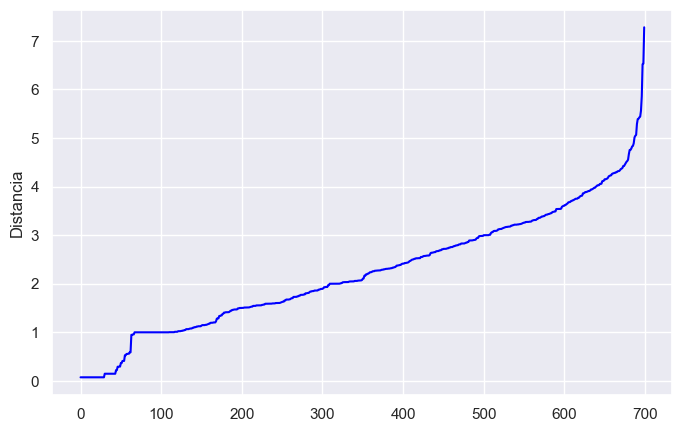

In [186]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize = (8,5))
plt.plot(distances, color='blue')
plt.ylabel('Distancia')
plt.show()

In [187]:
# Seleccion del punto de curvatura maximo
kl = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
kl.elbow

668

In [188]:
# Epsilon óptimo
epsilon = distances[kl.elbow]
epsilon

4.321558583278228

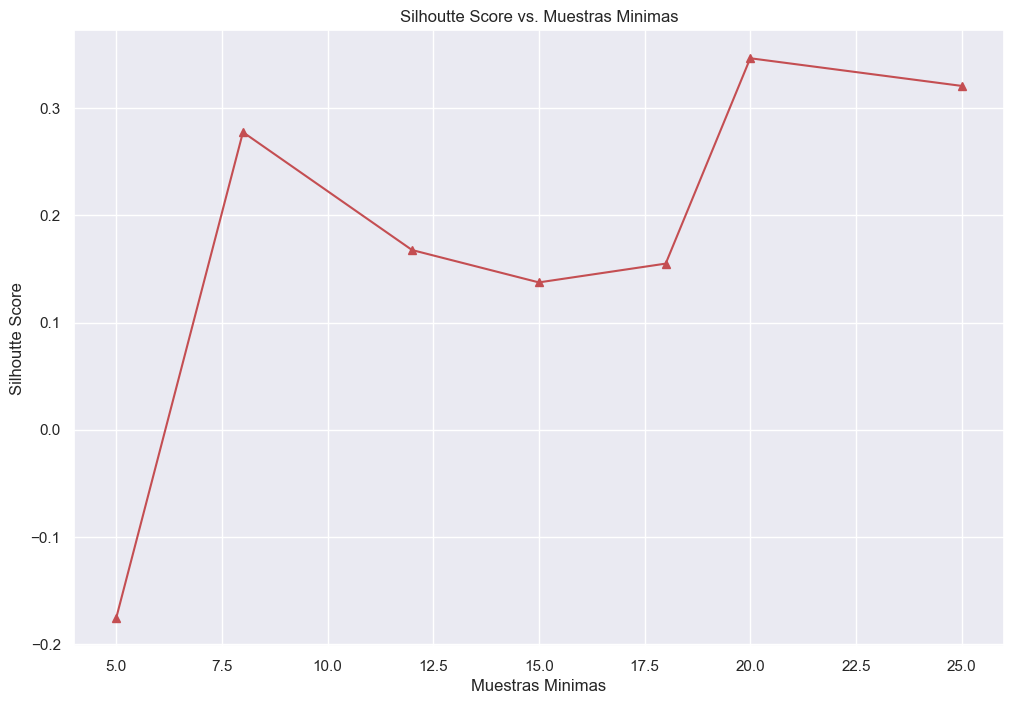

In [189]:
# Seleccion de hiperparametros min_simple
silhoutte_coefs = []

for min_points in [5, 8, 12, 15, 18, 20, 25]:
    model_d = DBSCAN(eps=epsilon, min_samples=min_points)
    model_d.fit(df1_out)
    silhoutte_coefs.append(silhouette_score(df1_out, model_d.labels_))

plt.figure(figsize = (12,8))
plt.plot([5, 8, 12, 15, 18, 20, 25], silhoutte_coefs, color='r', marker='^')
plt.xlabel('Muestras Minimas')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score vs. Muestras Minimas')
plt.show()

In [190]:
# Modelo DBSCAN
modelo_db = DBSCAN(eps=epsilon, min_samples=20, n_jobs=-1)
modelo_db.fit(df1_out)

DBSCAN(eps=4.321558583278228, min_samples=20, n_jobs=-1)

In [191]:
# Evaluacion del modelo
print(" DBSCAN ")
print('silhouette_score: ', silhouette_score(df1_out, modelo_db.labels_))
print('calinski_harabasz_score: ', calinski_harabasz_score(df1_out, modelo_db.labels_))

 DBSCAN 
silhouette_score:  0.346327040250145
calinski_harabasz_score:  490.6637249326333


In [192]:
# Predicion de los clusters
cluster_3 = modelo_db.fit_predict(df1_out)

df_clusters['cluster_3'] = cluster_3

df_clusters.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours,cluster_1,cluster_2,cluster_3
0,26,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,2,1,0,1,0.855365,-0.032906,-0.231133,0,0,0
1,0,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,...,1,1,0,0,1.477769,0.941840,-0.525284,2,2,-1
2,23,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,...,0,1,0,0,0.777564,-0.357821,-0.378208,0,0,0
3,7,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,...,2,1,1,0,-0.856246,-0.682736,-0.231133,1,4,-1
4,23,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,2,1,0,1,0.855365,-0.032906,-0.378208,0,3,0


In [193]:
df_clusters['cluster_3'].value_counts()

cluster_3
 0    373
-1    327
Name: count, dtype: int64

## * Algoritmo DBSCAN (Dataset Reducido)

In [234]:
# Gráfica de distancias K

neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(X_pca)

distances, *other = neighbors.kneighbors(X_pca)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis=0)
distances

(700,)


array([1.49232448e-03, 1.49232448e-03, 1.49232448e-03, 1.49232448e-03,
       1.49232448e-03, 1.49232448e-03, 1.49232448e-03, 1.49232448e-03,
       1.49232448e-03, 1.49232448e-03, 1.49232448e-03, 1.49232448e-03,
       1.49232448e-03, 1.49232448e-03, 1.49232448e-03, 1.49232448e-03,
       1.49232448e-03, 1.49232448e-03, 1.49232448e-03, 1.49232448e-03,
       1.49232448e-03, 1.49232448e-03, 1.49232448e-03, 1.49232448e-03,
       1.49232448e-03, 1.49232448e-03, 1.49232448e-03, 1.49232448e-03,
       1.49232448e-03, 1.49232448e-03, 2.98464895e-03, 2.98464895e-03,
       2.98464895e-03, 2.98464895e-03, 2.98464895e-03, 2.98464895e-03,
       2.98464895e-03, 2.98464895e-03, 2.98464895e-03, 2.98464895e-03,
       2.98464895e-03, 2.98464895e-03, 2.98464895e-03, 2.98464895e-03,
       4.47697343e-03, 4.47697343e-03, 5.96929791e-03, 5.96929791e-03,
       7.46162239e-03, 7.46162239e-03, 1.19385958e-02, 1.19385958e-02,
       2.08925427e-02, 2.08925427e-02, 2.38771916e-02, 2.38771916e-02,
      

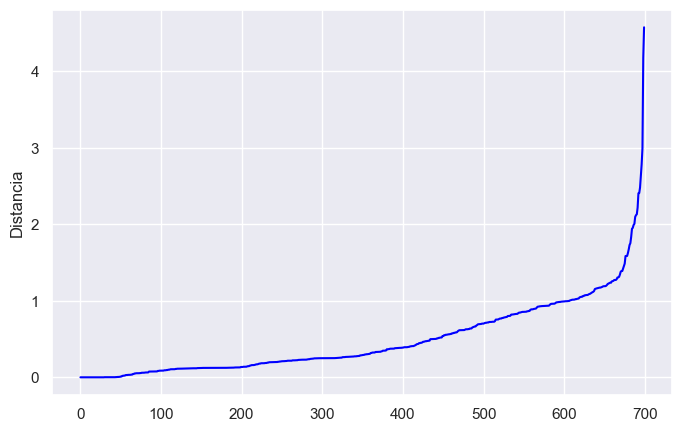

In [235]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize = (8,5))
plt.plot(distances, color='blue')
plt.ylabel('Distancia')
plt.show()

In [236]:
# Seleccion del punto de curvatura maximo
kl = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
kl.elbow

678

In [237]:
# Epsilon óptimo
epsilon = distances[kl.elbow]
epsilon

1.5883181948247267

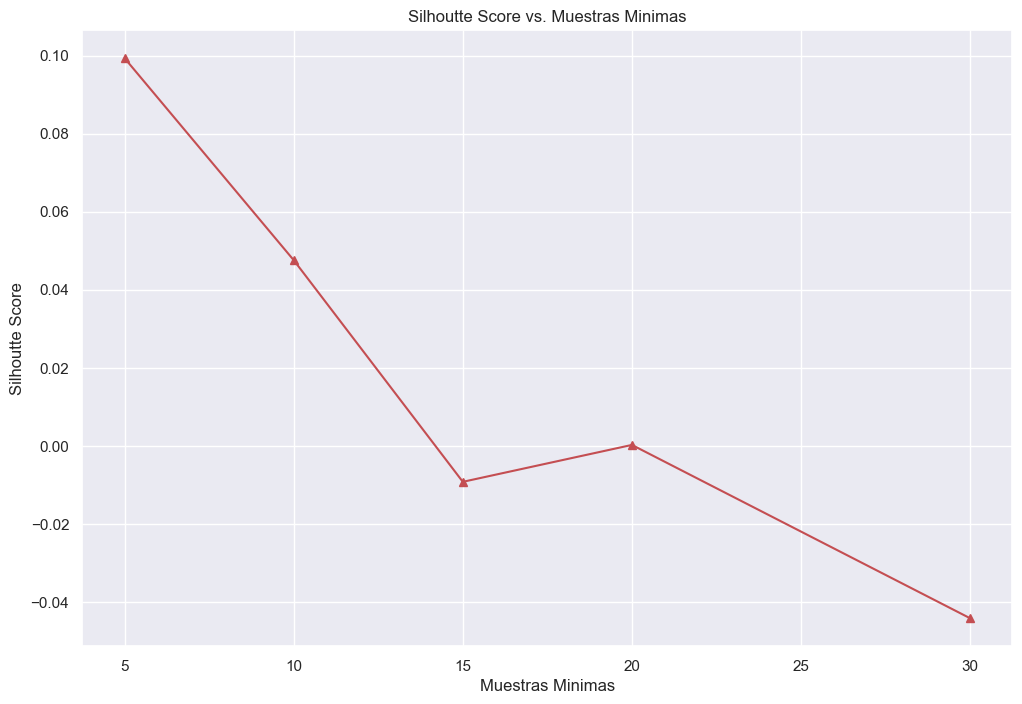

In [238]:
# Seleccion de hiperparametros min_simple
silhoutte_coefs = []

for min_points in [5, 10, 15, 20, 30]:
    model_d = DBSCAN(eps=epsilon, min_samples=min_points)
    model_d.fit(X_pca)
    silhoutte_coefs.append(silhouette_score(X_pca, model_d.labels_))

plt.figure(figsize = (12,8))
plt.plot([5, 10, 15, 20, 30], silhoutte_coefs, color='r', marker='^')
plt.xlabel('Muestras Minimas')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score vs. Muestras Minimas')
plt.show()

In [239]:
# Modelo DBSCAN
modelo_db = DBSCAN(eps = epsilon, min_samples=5, n_jobs=-1)
modelo_db.fit(X_pca)

DBSCAN(eps=1.5883181948247267, n_jobs=-1)

In [241]:
# Evaluacion del modelo
print(" DBSCAN ")
print('silhouette_score: ', silhouette_score(X_pca, modelo_db.labels_))
print('calinski_harabasz_score: ', calinski_harabasz_score(X_pca, modelo_db.labels_))

 DBSCAN 
silhouette_score:  0.09929757445402665
calinski_harabasz_score:  153.97375037535522


### Realizando Tuning de hiperpárametros para DBSCAN

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
# Define el espacio de búsqueda de parámetros
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5, 2.0],  # Valores a probar para el parámetro eps
    'min_samples': [3, 5, 10, 15, 20]       # Valores a probar para el parámetro min_samples
}

In [244]:
# Crea el modelo DBSCAN
modelo_db = DBSCAN()

# Define una función de puntuación personalizada utilizando silhouette_score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Configura la búsqueda de hiperparámetros utilizando Grid Search
grid_search = GridSearchCV(estimator=modelo_db, param_grid=param_grid, cv=5, n_jobs=-1, scoring=silhouette_scorer)

# Ejecuta la búsqueda de hiperparámetros
grid_search.fit(X_pca)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Entrena el modelo DBSCAN con los mejores parámetros
modelo_db_best = grid_search.best_estimator_
modelo_db_best.fit(X_pca)

Mejores parámetros: {'eps': 2.0, 'min_samples': 3}


DBSCAN(eps=2.0, min_samples=3)

In [245]:
# Evaluacion del modelo
print(" Tunning DBSCAN ")
print('silhouette_score: ', silhouette_score(X_pca, modelo_db_best.labels_))
print('calinski_harabasz_score: ', calinski_harabasz_score(X_pca, modelo_db_best.labels_))

 DBSCAN 
silhouette_score:  0.4269978390321452
calinski_harabasz_score:  464.2893634763519


In [246]:
# Predicion de los clusters
cluster_4 = modelo_db_best.fit_predict(X_pca)

df_clusters['cluster_4'] = cluster_4

df_clusters.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours,cluster_1,cluster_2,cluster_3,cluster_4
0,26,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,1,0,1,0.855365,-0.032906,-0.231133,0,0,0,0
1,0,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,...,1,0,0,1.477769,0.941840,-0.525284,2,2,-1,1
2,23,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,...,1,0,0,0.777564,-0.357821,-0.378208,0,0,0,0
3,7,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,...,1,1,0,-0.856246,-0.682736,-0.231133,1,4,-1,2
4,23,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,1,0,1,0.855365,-0.032906,-0.378208,0,3,0,0


In [247]:
df_clusters['cluster_4'].value_counts()

cluster_4
 0    406
 2    220
 3     29
 1     26
-1     19
Name: count, dtype: int64

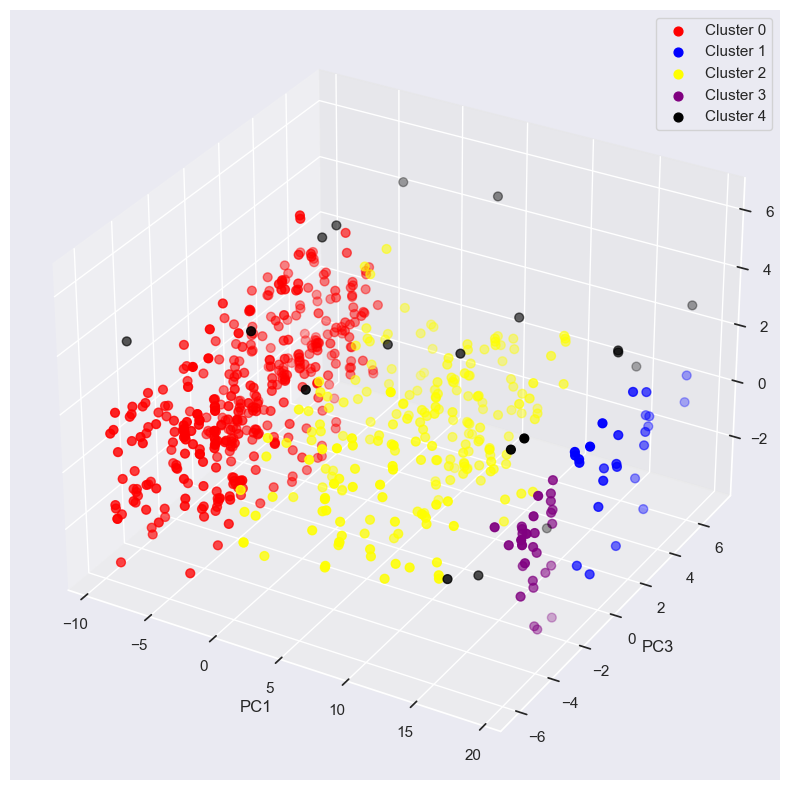

In [312]:
# 3d scatterplot

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[cluster_4 == 0, 0], X_pca[cluster_4 == 0, 1], X_pca[cluster_4 == 0, 2], s = 40, color = 'red', label = 'Cluster 0')
ax.scatter(X_pca[cluster_4 == 1, 0], X_pca[cluster_4 == 1, 1], X_pca[cluster_4 == 1, 2], s = 40, color = 'blue', label = 'Cluster 1')
ax.scatter(X_pca[cluster_4 == 2, 0], X_pca[cluster_4 == 2, 1], X_pca[cluster_4 == 2, 2], s = 40, color = 'yellow', label = 'Cluster 2')
ax.scatter(X_pca[cluster_4 == 3, 0], X_pca[cluster_4 == 3, 1], X_pca[cluster_4 == 3, 2], s = 40, color = 'purple', label = 'Cluster 3')
ax.scatter(X_pca[cluster_4 == -1, 0], X_pca[cluster_4 == -1, 1], X_pca[cluster_4 == -1, 2], s = 40, color = 'black', label = 'Cluster 4')



ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_ylabel('PC3')

ax.legend()
plt.show()

## * Gaussian Mixture (Dataset escalado)

Text(0.5, 0, 'Número de clusters')

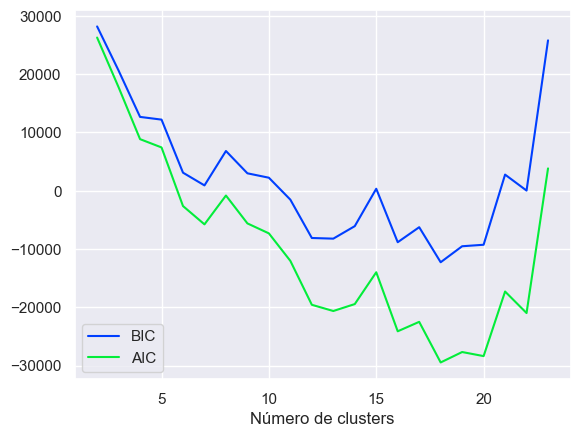

In [296]:
n_components = np.arange(2, 24)

model_g = [GaussianMixture(n_components=n, random_state=123).fit(df1_out) for n in n_components]

plt.plot(n_components, [m.bic(df1_out) for m in model_g], label='BIC')
plt.plot(n_components, [m.aic(df1_out) for m in model_g], label='AIC')
plt.legend()
plt.xlabel('Número de clusters')

In [306]:
# modelo GMM

model_gmm = GaussianMixture(n_components=7, random_state=123, covariance_type='full').fit(df1_out)

In [307]:
# Evaluacion del modelo GMM
labels_ = model_gmm.predict(df1_out)

print("Gaussian Mixture Model")
print('silhouette_score: ', silhouette_score(df1_out, labels_))
print('calinski_harabasz_score: ', calinski_harabasz_score(df1_out, labels_))

Gaussian Mixture Model
silhouette_score:  -0.04134806010183432
calinski_harabasz_score:  49.62411844725509


In [252]:
# Predicion de los clusters
cluster_5 = model_gmm.fit_predict(df1_out)

df_clusters['cluster_5'] = cluster_5

df_clusters.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Social smoker,Pet,Weight,Height,Absenteeism time in hours,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,26,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,0,1,0.855365,-0.032906,-0.231133,0,0,0,0,3
1,0,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,...,0,0,1.477769,0.941840,-0.525284,2,2,-1,1,5
2,23,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,...,0,0,0.777564,-0.357821,-0.378208,0,0,0,0,11
3,7,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,...,1,0,-0.856246,-0.682736,-0.231133,1,4,-1,2,6
4,23,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,0,1,0.855365,-0.032906,-0.378208,0,3,0,0,3


In [253]:
df_clusters['cluster_5'].value_counts()

cluster_5
11    315
7      88
9      57
4      43
10     38
3      34
0      32
2      28
5      21
1      17
6      14
8      13
Name: count, dtype: int64

## * Gaussian Mixture Dataset reducido

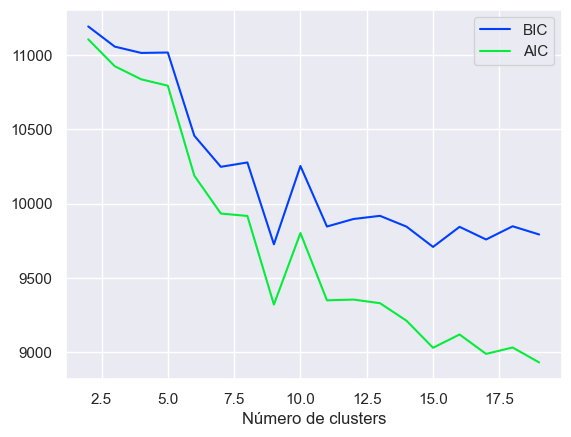

In [262]:
# Estimacion de hiperparametros
 
n_components = np.arange(2, 20)

models_g = [GaussianMixture(n_components=n, random_state=123).fit(X_pca) for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models_g], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models_g], label='AIC')
plt.legend()
plt.xlabel('Número de clusters')
plt.show()

In [289]:
# modelo GMM PCA

model_gmm_pca = GaussianMixture(n_components=3, random_state=123, covariance_type='full').fit(X_pca)

In [308]:
# Evaluacion del modelo GMM PCA
labels_ = model_gmm_pca.predict(X_pca)

print("Gaussian Mixture Model PCA")
print('silhouette_score: ', silhouette_score(X_pca, labels_))
print('calinski_harabasz_score: ', calinski_harabasz_score(X_pca, labels_))

Gaussian Mixture Model PCA
silhouette_score:  0.4761069333519351
calinski_harabasz_score:  928.6698174784516


In [309]:
# Predicion de los clusters
cluster_6 = model_gmm_pca.fit_predict(X_pca)

df_clusters['cluster_6'] = cluster_6

df_clusters.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Pet,Weight,Height,Absenteeism time in hours,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,26,7,3,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,1,0.855365,-0.032906,-0.231133,0,0,0,0,3,0
1,0,7,3,1,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,...,0,1.477769,0.941840,-0.525284,2,2,-1,1,5,2
2,23,7,4,1,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,...,0,0.777564,-0.357821,-0.378208,0,0,0,0,11,0
3,7,7,5,1,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,...,0,-0.856246,-0.682736,-0.231133,1,4,-1,2,6,1
4,23,7,5,1,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,1,0.855365,-0.032906,-0.378208,0,3,0,0,3,0


In [310]:
df_clusters['cluster_6'].value_counts()

cluster_6
0    428
1    213
2     59
Name: count, dtype: int64

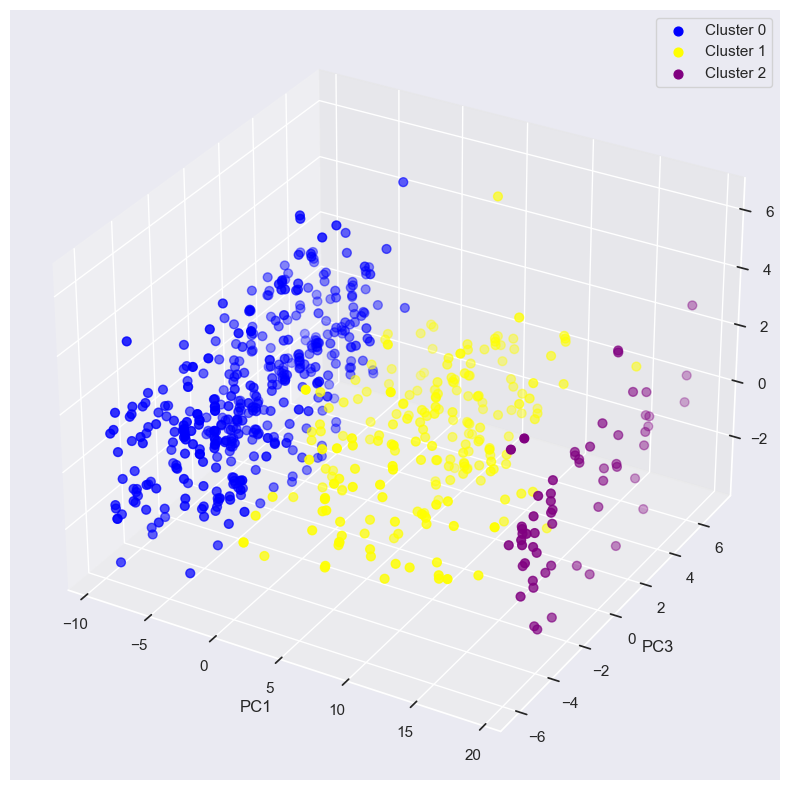

In [311]:
# 3d scatterplot

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[cluster_6 == 0, 0], X_pca[cluster_6 == 0, 1], X_pca[cluster_6 == 0, 2], s = 40, color = 'blue', label = 'Cluster 0')
ax.scatter(X_pca[cluster_6 == 1, 0], X_pca[cluster_6 == 1, 1], X_pca[cluster_6 == 1, 2], s = 40, color = 'yellow', label = 'Cluster 1')
ax.scatter(X_pca[cluster_6 == 2, 0], X_pca[cluster_6 == 2, 1], X_pca[cluster_6 == 2, 2], s = 40, color = 'purple', label = 'Cluster 2')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_ylabel('PC3')

ax.legend()
plt.show()